In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

from mplsoccer import PyPizza, add_image, FontManager

In [2]:
## fonts

#font_normal = FontManager("https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Regular.ttf")
#font_bold = FontManager("https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf")
#font_italic = FontManager("https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf")

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [8]:
## player info

player_name = "Olivier Giroud"
player_club = "Chelsea FC"
player_position = "Forwards"
player_age = "34"
season = "2020-21"

folder_name = f"Data/pizzas/{player_name.replace(' ','')}/"

image_cropped = Image.open(folder_name + "circle-cropped.png")

df = pd.read_csv(folder_name + "data.csv")

In [9]:
fbref_params_hash = {
    "Defenders":
    [
        "Non-Penalty Goals", "xA", "npxG", "Key Passes", "SCA (PassLive)",
        "Progressive Passes", "Progressive Carries", "Touches (Live-Ball)", "Pass Completion %", "Passes Completed",
        "Interceptions", "Aerials won", "Tackles Won", "% of Aerials Won", "Ball Recoveries"
    ],
    "Midfielders":
    [
        "Non-Penalty Goals", "xA", "npxG", "Key Passes", "SCA (PassLive)",
        "Progressive Passes", "Progressive Carries", "Touches (Live-Ball)", "Passes into Final Third", "Carries into Final Third",
        "Interceptions", "Pressures", "Tackles Won", "% of Aerials Won", "Ball Recoveries"
    ],
    "Forwards":
    [
        "Non-Penalty Goals", "xA", "npxG", "Shots Total", "Progressive Passes Rec",
        "Progressive Passes", "Progressive Carries", "Touches (Att Pen)", "Passes into Penalty Area", "Carries into Penalty Area",
        "Tkl+Int", "Pressures", "Pressures (Att 3rd)", "% of Aerials Won", "Ball Recoveries"
    ]
}


params_hash = {
    "Defenders":
    [
        "Non-Penalty\nGoals", "xA", "npxG", "Key Passes", "Open Play\nShot-Creating Actions", # attacking
        "Progressive\nPasses", "Progressive\n Carries", "Open Play\nTouches", "Pass Completion %", "Completed Passes", # possession
        "Interceptions", "Aerial Duels\nWon", "Tackles Won", "Aerial Win\nPercentage", "Ball Recoveries" # defending
    ],
    "Midfielders":
    [
        "Non-Penalty\nGoals", "xA", "npxG", "Key Passes", "Open Play\nShot-Creating Actions", # attacking
        "Progressive\nPasses", "Progressive\n Carries", "Open Play\nTouches", "Passes into\nFinal Third", "Carries into\nFinal Third", # possession
        "Interceptions", "Pressures", "Tackles Won", "Aerial Win\nPercentage", "Ball Recoveries" # defending
    ],
    "Forwards":
    [
       "Non-Penalty\nGoals", "xA", "npxG", "Shot Volume", "Progressive\nPasses Received", # attacking
       "Progressive\nPasses", "Progressive\n Carries", "Final Third\nTouches", "Passes into\nPenalty Area", "Carries into\nPenalty Area", # possession
       "Tackles &\nInterceptions", "Pressures", "Pressures\nFinal Third", "Aerial Win\nPercentage", "Ball Recoveries" # defending 
    ]
}

In [10]:
num_stats = 5 # for each att, def, pos

fbref_params = fbref_params_hash[player_position]
# parameter list
params = params_hash[player_position]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
used_stats = df[df['Statistic'].isin(fbref_params)].drop_duplicates()
sorted_stats = used_stats.set_index('Statistic').loc[fbref_params].reset_index()
values = sorted_stats['Percentile']

In [11]:
# color for the slices and text

att_col = "#1A78CF"
pos_col = "#FF9300"
def_col = "#D70232"

background = "#000000"
foreground = "#FFFFFF"
subtext1 = "#A1C5FF"
subtext2 = "#F2F2F2"

slice_colors = [att_col] * num_stats + [pos_col] * num_stats + [def_col] * num_stats
text_colors = [foreground] * 3 * num_stats

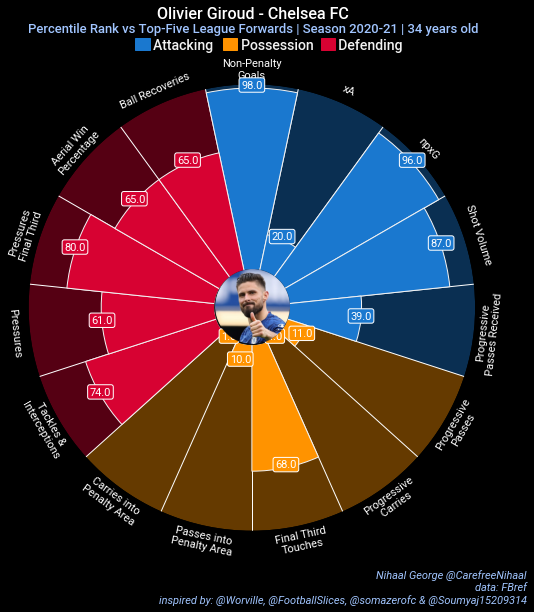

In [12]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color=background,    # background color
    straight_line_color=foreground, # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor=subtext2, zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color=foreground, fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color=foreground, fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor=foreground, facecolor=subtext1,
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, f"{player_name} - {player_club}", size=16,
    ha="center", fontproperties=font_bold.prop, color=foreground
)

# add subtitle
fig.text(
    0.515, 0.953,
    f"Percentile Rank vs Top-Five League {player_position} | Season {season} | {player_age} years old",
    size=13,
    ha="center", fontproperties=font_bold.prop, color=subtext1
)

# add credits
CREDIT_1 = "Nihaal George @CarefreeNihaal"
CREDIT_2 = "data: FBref"
CREDIT_3 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}", size=11,
    fontproperties=font_italic.prop, color=subtext1,
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color=subtext2
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color=att_col,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color=pos_col,
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color=def_col,
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    image_cropped, fig, left=0.4478, bottom=0.44, width=0.13, height=0.127
)

plt.show()